In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data=pd.read_csv("Train.csv")

In [3]:
data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
cat_list=[]                           #list of catagories
for t in data.dtypes.index:
    if data.dtypes[t]=="object":
        cat_list.append(t)
cat_list

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [8]:
data.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [9]:
cat_list.remove("Item_Identifier")
cat_list.remove("Outlet_Identifier")

In [10]:
for cat in cat_list:
    print(cat)
    print(data[cat].value_counts())
    print(" ")
    print(" ")

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
 
 
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
 
 
Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
 
 
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64
 
 
Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type,

In [11]:
Item_W_mean=data["Item_Weight"].mean()
Item_W_mean

12.857645184136183

In [12]:
bool_t=data["Item_Weight"].isnull()
bool_t


0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [13]:
table=data.pivot_table(values="Item_Weight",index="Item_Identifier")
table

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [14]:
for i,item in enumerate(data["Item_Identifier"]):
    if bool_t[i]:
        if item in table:
            data["Item_Weight"][i]=table.loc[item]["Item_Weight"]
        else:
            data["Item_Weight"][i]=Item_W_mean               #for this item we have no info.
                

In [15]:
outlet_table=data.pivot_table(values="Outlet_Size",index="Outlet_Type",aggfunc=lambda x: x.mode())
outlet_table

,Outlet_Size
Outlet_Type,
Grocery Store,Small
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


In [16]:
bool_outlet=data["Outlet_Size"].isnull()
bool_outlet

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [17]:
for t,item in enumerate(data["Outlet_Type"]):
    if bool_outlet[t]:
        data["Outlet_Size"][t]=outlet_table.loc[item]["Outlet_Size"]

In [18]:
data["Outlet_Size"].isnull().sum()

0

In [19]:
sum(data["Item_Visibility"]==0)

526

In [20]:
bool_visibility=data["Item_Visibility"]==0
bool_visibility

0       False
1       False
2       False
3        True
4        True
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Visibility, Length: 8523, dtype: bool

In [21]:
for t,item in enumerate(data["Item_Visibility"]):
    if bool_visibility[t]:
        data["Item_Visibility"][t]=data["Item_Visibility"].mean()

In [22]:
sum(data["Item_Visibility"]==0)

0

In [23]:
data["Item_Fat_Content"]=data["Item_Fat_Content"].replace({'LF':'Low Fat',"low fat":'Low Fat',"reg":"Regular"})

In [24]:
data["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [25]:
data["new_col"]=data["Item_Identifier"].apply(lambda x:x[:2] )
data["new_col"]

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: new_col, Length: 8523, dtype: object

In [26]:
data["new_col"]=data["new_col"].replace({"FD":"Food","NC":"NON-CONSUMABLE","DR":"DRINK"})
data["new_col"]

0                 Food
1                DRINK
2                 Food
3                 Food
4       NON-CONSUMABLE
             ...      
8518              Food
8519              Food
8520    NON-CONSUMABLE
8521              Food
8522             DRINK
Name: new_col, Length: 8523, dtype: object

In [27]:
bool_new=data["new_col"]=="NON-CONSUMABLE"

In [28]:
for t,item in enumerate(data["new_col"]):
    if bool_new[t]:
        data["Item_Fat_Content"][t]="Non-Edible"

In [29]:
data["Item_Fat_Content"].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [30]:
data["outlet_age"]=2013-data["Outlet_Establishment_Year"]
data["outlet_age"]

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: outlet_age, Length: 8523, dtype: int64

In [31]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,new_col,outlet_age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DRINK,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Edible,0.066140,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NON-CONSUMABLE,26


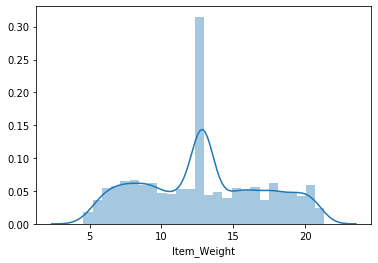

In [32]:
sns.distplot(data["Item_Weight"])

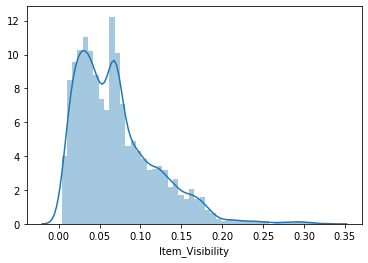

In [33]:
sns.distplot(data["Item_Visibility"])

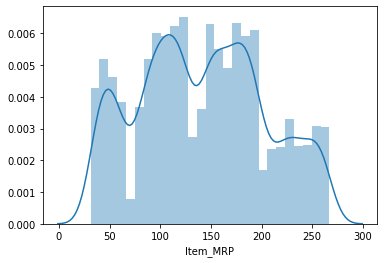

In [34]:
sns.distplot(data["Item_MRP"])

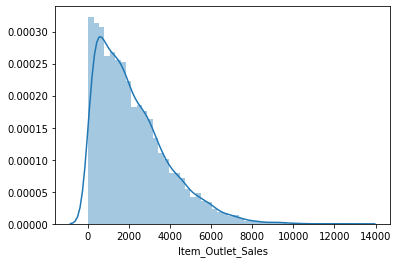

In [35]:
sns.distplot(data["Item_Outlet_Sales"])

In [36]:
data["Item_Outlet_Sales"]=np.log(1+data["Item_Outlet_Sales"])

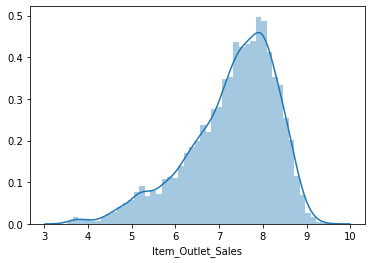

In [37]:
sns.distplot(data["Item_Outlet_Sales"])

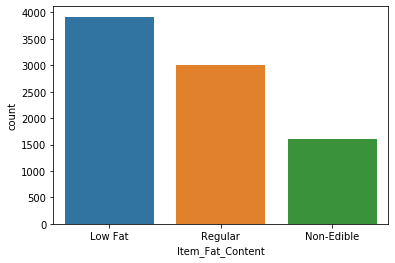

In [38]:
sns.countplot(data["Item_Fat_Content"])

[Text(0, 0, 'Dairy'),
 Text(0, 0, 'Soft Drinks'),
 Text(0, 0, 'Meat'),
 Text(0, 0, 'Fruits and Vegetables'),
 Text(0, 0, 'Household'),
 Text(0, 0, 'Baking Goods'),
 Text(0, 0, 'Snack Foods'),
 Text(0, 0, 'Frozen Foods'),
 Text(0, 0, 'Breakfast'),
 Text(0, 0, 'Health and Hygiene'),
 Text(0, 0, 'Hard Drinks'),
 Text(0, 0, 'Canned'),
 Text(0, 0, 'Breads'),
 Text(0, 0, 'Starchy Foods'),
 Text(0, 0, 'Others'),
 Text(0, 0, 'Seafood')]

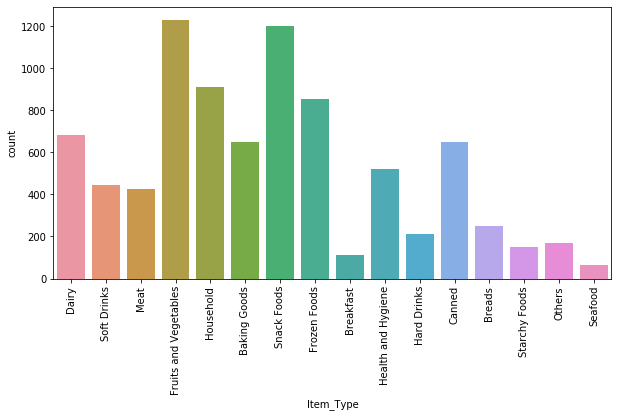

In [39]:
plt.figure(figsize=(10,5))
chart=sns.countplot(data["Item_Type"])
chart.set_xticklabels(labels=data["Item_Type"].unique(),rotation=90)


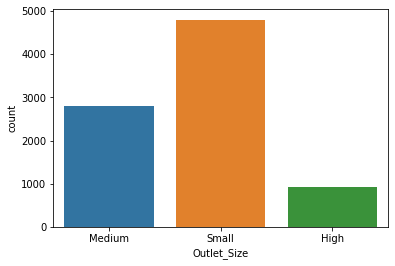

In [40]:
sns.countplot(data["Outlet_Size"])

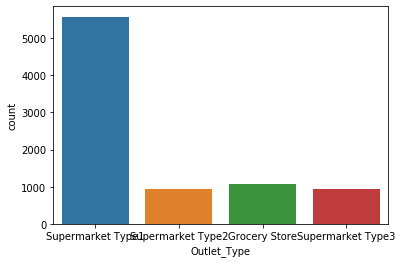

In [41]:
sns.countplot(data["Outlet_Type"])

In [42]:
corr=data.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,outlet_age
Item_Weight,1.000000,-0.017603,0.024756,-0.008301,0.008059,0.008301
Item_Visibility,-0.017603,1.000000,-0.005316,-0.078424,-0.202363,0.078424
Item_MRP,0.024756,-0.005316,1.000000,0.005020,0.509886,-0.005020
Outlet_Establishment_Year,-0.008301,-0.078424,0.005020,1.000000,0.077032,-1.000000
Item_Outlet_Sales,0.008059,-0.202363,0.509886,0.077032,1.000000,-0.077032
outlet_age,0.008301,0.078424,-0.005020,-1.000000,-0.077032,1.000000


(6.0, 0.0)

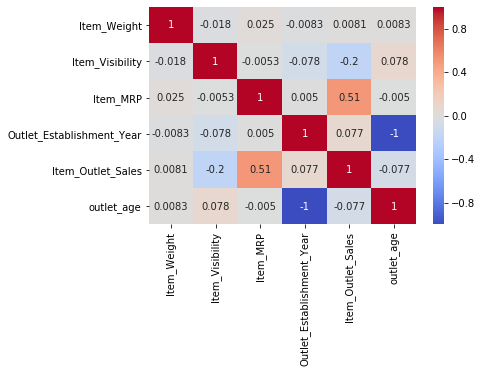

In [43]:
ax=sns.heatmap(corr,cmap="coolwarm",annot=True)

bottom, top = ax.get_ylim()                       #to properly adjust the plot
ax.set_ylim(bottom + 0.5, top - 0.5)

In [44]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,new_col,outlet_age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,DRINK,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,6.597664,Food,15
4,NCD19,8.93,Non-Edible,0.066140,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451,NON-CONSUMABLE,26


In [45]:
cat_list

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [46]:
from sklearn.preprocessing import LabelEncoder                            #label encoding
le=LabelEncoder()

data["Item_Identifier"]=le.fit_transform(data["Item_Identifier"])
data["new_col"]=le.fit_transform(data["new_col"])
data["Outlet_Identifier"]=le.fit_transform(data["Outlet_Identifier"])

for t in cat_list:
    data[t]=le.fit_transform(data[t])


In [47]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,new_col,outlet_age
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,8.225808,1,14
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,6.096776,0,4
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,7.648868,1,14
3,1121,19.20,2,0.066132,6,182.0950,0,1998,2,2,0,6.597664,1,15
4,1297,8.93,1,0.066140,9,53.8614,1,1987,0,2,1,6.903451,2,26


In [48]:
len(data["Outlet_Identifier"].unique())

10

In [49]:
cat_list.append("new_col")

In [50]:
cat_list

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'new_col']

In [51]:
data=pd.get_dummies(data,columns=cat_list)
data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,outlet_age,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,new_col_0,new_col_1,new_col_2
0,156,9.30,0.016047,249.8092,9,1999,8.225808,14,1,0,...,1,0,0,0,1,0,0,0,1,0
1,8,5.92,0.019278,48.2692,3,2009,6.096776,4,0,0,...,0,0,1,0,0,1,0,1,0,0
2,662,17.50,0.016760,141.6180,9,1999,7.648868,14,1,0,...,1,0,0,0,1,0,0,0,1,0
3,1121,19.20,0.066132,182.0950,0,1998,6.597664,15,0,0,...,0,0,1,1,0,0,0,0,1,0
4,1297,8.93,0.066140,53.8614,1,1987,6.903451,26,0,1,...,0,0,1,0,1,0,0,0,0,1


In [62]:
X=data.drop(columns=["Item_Outlet_Sales","Outlet_Establishment_Year"])
y=data["Item_Outlet_Sales"]

In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [66]:
datat=pd.read_csv("test.csv")
datat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [69]:
X_test=datat.drop(columns=["Outlet_Establishment_Year"])
#y_test=datat["Item_Outlet_Sales"]

In [79]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

def base(model,X,y):
    
    model.fit(X,y)
    
    pred=model.predict(X)
    
    cv_score=cross_val_score(model, X, y, scoring="neg_mean_squared_error",cv=10)
    cv_score=np.abs(np.mean(cv_score))
    
    
    print("MSE:",mean_squared_error(y,pred))
    print("CV_Score:",cv_score)
        

In [81]:
from sklearn.linear_model import LinearRegression

model=LinearRegression(normalize=True)
base(model,X,y)

MSE: 0.2879724562444086
CV_Score: 0.2906056734972426


In [56]:
from sklearn.linear_model import Lasso

model=Lasso(normalize=True)
base(model,X,y)

MSE: 1.0305333080087593
CV_Score: 1.030660096895797


In [57]:
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()
base(model,X,y)

MSE: 0.05759864109790697
CV_Score: 0.33113350686360205
